In [8]:
from astropy.table import Table, Column
import matplotlib.pyplot as plt
import numpy as np

In [28]:
plotpar = {
           'axes.labelsize': 20,
           'axes.titlesize' : 17,
           'font.size': 10,
           'legend.fontsize': 15,
           'xtick.labelsize': 17,
           'ytick.labelsize': 17,
           'text.usetex': False
}
plt.rcParams.update(plotpar)

In [12]:
df = Table.read('../../catalogs/Combined/main_non_rep_garchive.vot')
df

main_non_rep_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,SpType,Lstar,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_2,ruwe_f,ipd_f,rv_robust_old_bin,rv_amp_f
,,solMass,d,solRad,deg,deg,,,[yr],,0.01 solLum,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,,
int32,int64,float32,float64,float32,float64,float64,float64,object,float32,str6,float32,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,float32,int64,int64,int64,int64
1,2859027409595355776,0.26,1.08,0.27,6.14834,30.04158,1.298,Newton17,--,,--,22.453743,0,51.316075949778615,585.9754,585.8907544586369,9.959853297532621,12.960726,3.1202898,10.285248,1.3245473,1.2977159,0,0,1,0
2,416158489625704320,0.42,52.82,0.43,8.97791,52.68592,1.382,Newton17,--,,--,3.9425075,2,41.170241007502874,798.139,777.168600019981,-181.75470165920962,11.530065,2.390316,-0.6372399,0.21027899,1.3819181,0,1,1,0
3,2779735823615714176,0.3,34.01,0.32,9.89131,14.90545,1.462,Newton17,--,,--,14.191612,0,34.81687111605054,333.7426,331.9076871660051,34.94894273834515,12.900315,2.784772,3.5010433,0.75865865,1.4623499,1,0,1,0
4,2779735819320035840,0.33,1.59,0.34,9.89231,14.90984,9.76,Newton17,--,,--,37.42855,0,34.257941698203155,328.88693,327.53892627570303,29.746753158291376,12.961825,3.0671816,4.04884,1.9026254,9.759859,1,0,1,0
5,2805045756653326080,0.32,1.7,0.33,12.63954,24.81658,1.538,Newton17,--,,--,--,40,66.7255813106135,205.82779,203.42839500687333,-31.33633841725112,11.240654,2.7810097,7.129615,1.0481054,1.5382388,1,1,0,0
6,327944328126649856,0.11,0.28,0.14,34.29474,35.44122,1.209,Newton17,--,,--,--,0,96.7355313539234,607.2568,548.9680375393165,-259.60526407353575,13.68886,3.9345303,--,--,1.209282,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,1022456104850892928,0.58,16.88,0.58,138.60285,52.68636,1.118,Shan,--,M0.0 V,7.55,0.8336086,0,157.8824911260602,1705.8522,-1573.0402244550992,-659.9060008123529,7.054455,1.8464499,11.969568,0.122066654,1.118406,0,0,1,0


In [139]:
df['rv_amplitude_robust'].info()

name = rv_amplitude_robust
dtype = float32
unit = km / s
description = Total amplitude in the radial velocity time series after outlier
     removal
class = MaskedColumn
n_bad = 1106
length = 1807


In [14]:
masked_rv_bin = df['rv_robust_old_bin'] == 1 #not good
masked_ruwe_bin = df['ruwe_f'] == 1
masked_ipd_bin = df['ipd_f'] == 1
masked_all_bin = df['ruwe_f'] + df['ipd_f'] + df['rv_robust_old_bin'] == 1

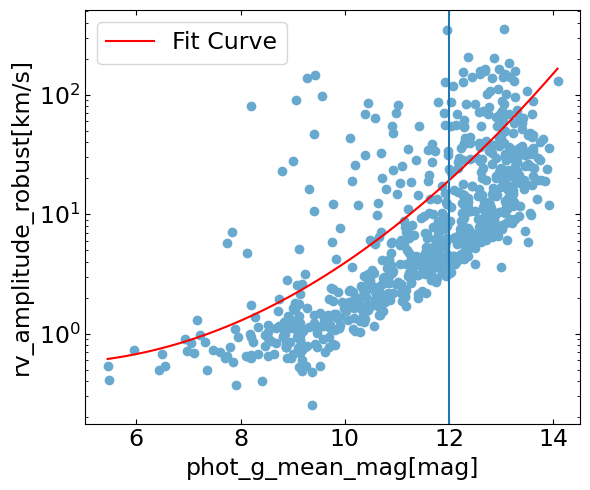

In [124]:
plt.figure(figsize=(6, 5))

plt.scatter(df['phot_g_mean_mag'], df['rv_amplitude_robust'], color='#67a9cf')
# plt.scatter(df['phot_g_mean_mag'][~masked_rv_bin], df['rv_amplitude_robust'][~masked_rv_bin], color='#ef8a62', label = 'Single Stars')

#Returns a vector of coefficients p
coefficients = np.polyfit(df['phot_g_mean_mag'][masked_rv_bin], np.log(df['rv_amplitude_robust'][masked_rv_bin]), 2) 

coefficients[0] += 0.0045

#construct the poly
poly = np.poly1d(coefficients)

# x_axis
x_fit = np.linspace(min(df['phot_g_mean_mag'][masked_rv_bin]), max(df['phot_g_mean_mag'][masked_rv_bin]), 100)

# y_axis 
y_fit = np.exp(poly(x_fit))

#fit curve
plt.plot(x_fit, y_fit, color='red', label='Fit Curve')

plt.axvline(x = 12,linestyle = '-')

plt.yscale('log')
plt.ylabel('rv_amplitude_robust[km/s]')
plt.xlabel('phot_g_mean_mag[mag]')
plt.legend()
plt.tick_params('both',direction='in',top=True,right=True)
plt.tick_params('both',which='minor',direction='in',right=True)
plt.tight_layout()

plt.savefig('../../plots/presentation/rv_amp_fit.png')

In [72]:
poly

poly1d([ 0.05913835, -0.50597684,  0.51327916])

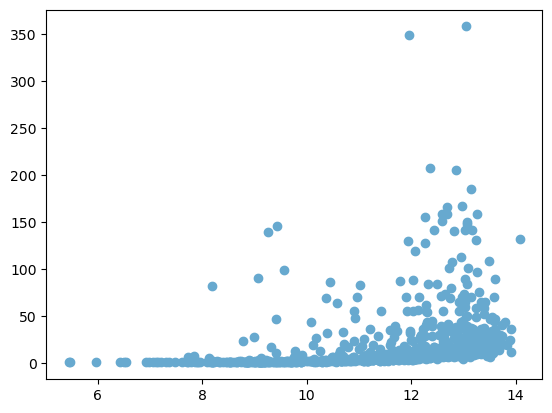

In [74]:
plt.scatter(df['phot_g_mean_mag'], df['rv_amplitude_robust'], color='#67a9cf', label = 'Binary Stars')


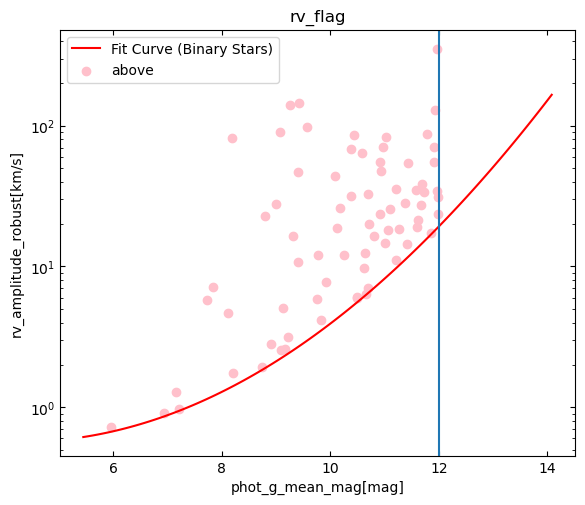

In [76]:
plt.figure(figsize=(6, 5))

#Returns a vector of coefficients p
coefficients = np.polyfit(df['phot_g_mean_mag'][masked_rv_bin], np.log(df['rv_amplitude_robust'][masked_rv_bin]), 2) 

coefficients[0] += 0.0045

#construct the poly
poly = np.poly1d(coefficients)

# x_axis
x_fit = np.linspace(min(df['phot_g_mean_mag'][masked_rv_bin]), max(df['phot_g_mean_mag'][masked_rv_bin]), 100)

# y_axis 
y_fit = np.exp(poly(x_fit))

#fit curve
plt.plot(x_fit, y_fit, color='red', label='Fit Curve (Binary Stars)')

#store points above fit
pts_above = df['rv_amplitude_robust'] > np.exp(poly(df['phot_g_mean_mag']))

g_cut =  df['phot_g_mean_mag'] < 12
 
x_bin = df['phot_g_mean_mag']
y_bin = df['rv_amplitude_robust']

plt.scatter(x_bin[pts_above & g_cut], y_bin[pts_above & g_cut], color = 'pink', label = 'above')

plt.axvline(x = 12,linestyle = '-')

rv_amplitude_above = df['rv_amplitude_robust'][pts_above & g_cut]
g_above = df['rv_amplitude_robust'][pts_above & g_cut]

df['rv_amp_bin'] = np.where(pts_above & g_cut, 1, 0)

plt.yscale('log')
plt.ylabel('rv_amplitude_robust[km/s]')
plt.xlabel('phot_g_mean_mag[mag]')
plt.legend()
plt.tight_layout()
plt.title('rv_flag')
plt.tick_params('both',direction='in',top=True,right=True)
plt.tick_params('both',which='minor',direction='in',right=True)

In [68]:
# add_this = Column(data = df['rv_amp_bin'], name = 'rv_robust_f')
# df.replace_column('rv_amp_bin', add_this)

In [58]:
# df.write('../../catalogs/Combined/main.vot', format = 'votable', overwrite = True)

In [74]:
df

main_non_rep_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,SpType,Lstar,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_2,ruwe_f,ipd_f,rv_robust_old_bin,rv_amp_bin
,,solMass,d,solRad,deg,deg,,,[yr],,0.01 solLum,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,,
int32,int64,float32,float64,float32,float64,float64,float64,object,float32,str6,float32,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,float32,int64,int64,int64,int64
1,2859027409595355776,0.26,1.08,0.27,6.14834,30.04158,1.298,Newton17,--,,--,22.453743,0,51.316075949778615,585.9754,585.8907544586369,9.959853297532621,12.960726,3.1202898,10.285248,1.3245473,1.2977159,0,0,1,0
2,416158489625704320,0.42,52.82,0.43,8.97791,52.68592,1.382,Newton17,--,,--,3.9425075,2,41.170241007502874,798.139,777.168600019981,-181.75470165920962,11.530065,2.390316,-0.6372399,0.21027899,1.3819181,0,1,1,0
3,2779735823615714176,0.3,34.01,0.32,9.89131,14.90545,1.462,Newton17,--,,--,14.191612,0,34.81687111605054,333.7426,331.9076871660051,34.94894273834515,12.900315,2.784772,3.5010433,0.75865865,1.4623499,1,0,1,0
4,2779735819320035840,0.33,1.59,0.34,9.89231,14.90984,9.76,Newton17,--,,--,37.42855,0,34.257941698203155,328.88693,327.53892627570303,29.746753158291376,12.961825,3.0671816,4.04884,1.9026254,9.759859,1,0,1,0
5,2805045756653326080,0.32,1.7,0.33,12.63954,24.81658,1.538,Newton17,--,,--,--,40,66.7255813106135,205.82779,203.42839500687333,-31.33633841725112,11.240654,2.7810097,7.129615,1.0481054,1.5382388,1,1,0,0
6,327944328126649856,0.11,0.28,0.14,34.29474,35.44122,1.209,Newton17,--,,--,--,0,96.7355313539234,607.2568,548.9680375393165,-259.60526407353575,13.68886,3.9345303,--,--,1.209282,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,1022456104850892928,0.58,16.88,0.58,138.60285,52.68636,1.118,Shan,--,M0.0 V,7.55,0.8336086,0,157.8824911260602,1705.8522,-1573.0402244550992,-659.9060008123529,7.054455,1.8464499,11.969568,0.122066654,1.118406,0,0,1,0


In [14]:
poly

poly1d([ 0.05625179, -0.49443918,  0.81812091])

In [16]:
coefficients

array([ 0.05625179, -0.49443918,  0.81812091])

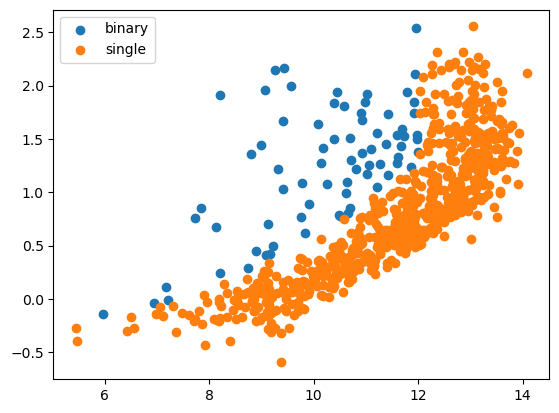

In [78]:
rv_bin = df['rv_amp_bin'] == 1

plt.scatter(df['phot_g_mean_mag'][rv_bin], np.log10(df['rv_amplitude_robust'][rv_bin]), label = 'binary')
plt.scatter(df['phot_g_mean_mag'][~rv_bin], np.log10(df['rv_amplitude_robust'][~rv_bin]), label = 'single')

plt.legend()
plt.show()

In [148]:
def func(rv_amp, phot_g_mag, poly):

    pts_above = rv_amp > np.exp(poly(phot_g_mag))
    g_cut = phot_g_mag < 12
    
    condition = pts_above & g_cut
    
    flag = np.where(condition, 1, 0)
    
    return flag

In [150]:
list = func(df['rv_amplitude_robust'], df['phot_g_mean_mag'], poly)
rv_amp_f = Column(data = list, name = 'rv_amp_f')
df.add_column(rv_amp_f)


ValueError: Cannot replace column 'rv_amp_f'.  Use Table.replace_column() instead.

In [162]:
df.remove_column('rv_amp_bin')
df

main_non_rep_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,SpType,Lstar,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_2,ruwe_f,ipd_f,rv_robust_old_bin,rv_amp_f
,,solMass,d,solRad,deg,deg,,,[yr],,0.01 solLum,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,,
int32,int64,float32,float64,float32,float64,float64,float64,object,float32,str6,float32,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,float32,int64,int64,int64,int64
1,2859027409595355776,0.26,1.08,0.27,6.14834,30.04158,1.298,Newton17,--,,--,22.453743,0,51.316075949778615,585.9754,585.8907544586369,9.959853297532621,12.960726,3.1202898,10.285248,1.3245473,1.2977159,0,0,1,0
2,416158489625704320,0.42,52.82,0.43,8.97791,52.68592,1.382,Newton17,--,,--,3.9425075,2,41.170241007502874,798.139,777.168600019981,-181.75470165920962,11.530065,2.390316,-0.6372399,0.21027899,1.3819181,0,1,1,0
3,2779735823615714176,0.3,34.01,0.32,9.89131,14.90545,1.462,Newton17,--,,--,14.191612,0,34.81687111605054,333.7426,331.9076871660051,34.94894273834515,12.900315,2.784772,3.5010433,0.75865865,1.4623499,1,0,1,0
4,2779735819320035840,0.33,1.59,0.34,9.89231,14.90984,9.76,Newton17,--,,--,37.42855,0,34.257941698203155,328.88693,327.53892627570303,29.746753158291376,12.961825,3.0671816,4.04884,1.9026254,9.759859,1,0,1,0
5,2805045756653326080,0.32,1.7,0.33,12.63954,24.81658,1.538,Newton17,--,,--,--,40,66.7255813106135,205.82779,203.42839500687333,-31.33633841725112,11.240654,2.7810097,7.129615,1.0481054,1.5382388,1,1,0,0
6,327944328126649856,0.11,0.28,0.14,34.29474,35.44122,1.209,Newton17,--,,--,--,0,96.7355313539234,607.2568,548.9680375393165,-259.60526407353575,13.68886,3.9345303,--,--,1.209282,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,1022456104850892928,0.58,16.88,0.58,138.60285,52.68636,1.118,Shan,--,M0.0 V,7.55,0.8336086,0,157.8824911260602,1705.8522,-1573.0402244550992,-659.9060008123529,7.054455,1.8464499,11.969568,0.122066654,1.118406,0,0,1,0


In [160]:
df['rv_amp_bin'].sum()

74

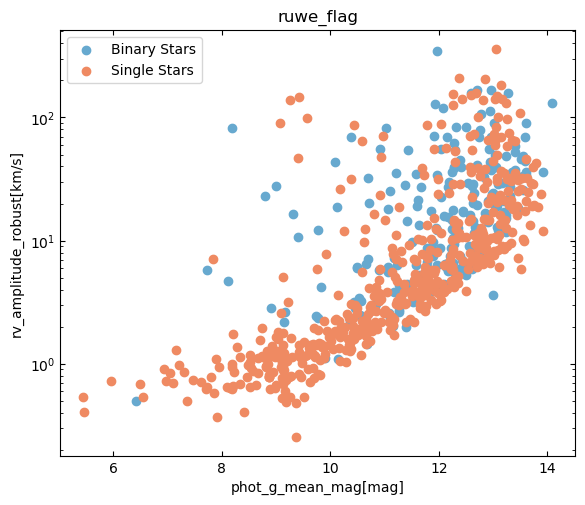

In [82]:
#ruwe is not a good indicator for rv_amp_robust

plt.figure(figsize=(6, 5))

plt.scatter(df['phot_g_mean_mag'][masked_ruwe_bin], df['rv_amplitude_robust'][masked_ruwe_bin], color='#67a9cf', label = 'Binary Stars')
plt.scatter(df['phot_g_mean_mag'][~masked_ruwe_bin], df['rv_amplitude_robust'][~masked_ruwe_bin], color='#ef8a62', label = 'Single Stars')

plt.yscale('log')
plt.ylabel('rv_amplitude_robust[km/s]')
plt.xlabel('phot_g_mean_mag[mag]')
plt.legend()
plt.tight_layout()
plt.title('ruwe_flag')
plt.tick_params('both',direction='in',top=True,right=True)
plt.tick_params('both',which='minor',direction='in',right=True)

In [176]:
# df.write('../../catalogs/Combined/main_non_rep_garchive.vot', format = 'votable', overwrite = True)

In [38]:
masked_rv_amp_bin = df['rv_amp_f'] == 1

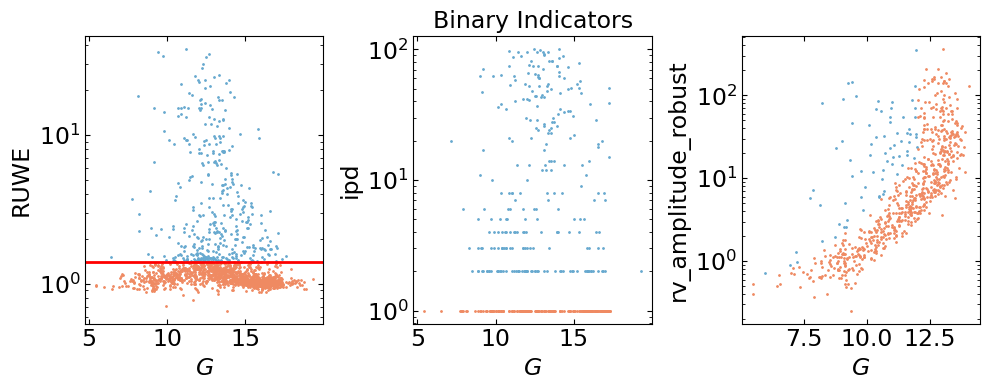

In [153]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 4))

axes[0].scatter(df['phot_g_mean_mag'][masked_ruwe_bin], df['ruwe'][masked_ruwe_bin], color='#67a9cf', label='Binary Stars', s = 1)
axes[0].scatter(df['phot_g_mean_mag'][~masked_ruwe_bin], df['ruwe'][~masked_ruwe_bin], color='#ef8a62', label='Single Stars', s =1)
axes[0].set_yscale('log')
# axes[0].set_ylabel('rv_amplitude_robust[km/s]')
axes[0].axhline(1.4, color= 'r', linestyle= '-', linewidth = 2)
axes[0].set_xlabel(r'$G$')
axes[0].set_ylabel('RUWE')

# axes[0].legend()
# axes[0].set_title('RUWE [>1.4]')
axes[0].tick_params('both', direction='in', top=True, right=True)
axes[0].tick_params('both', which='minor', direction='in', right=True)

# Second subplot: Single Stars
axes[1].scatter(df['phot_g_mean_mag'][masked_ipd_bin], df['ipd_frac_multi_peak'][masked_ipd_bin], color='#67a9cf', label='Binary Stars', s= 1)
axes[1].scatter(df['phot_g_mean_mag'][~masked_ipd_bin], df['ipd_frac_multi_peak'][~masked_ipd_bin], color='#ef8a62', label='Single Stars',s=1)
axes[1].set_yscale('log')
axes[1].set_xlabel(r'$G$')
axes[1].set_ylabel('ipd')

# axes[1].legend()
axes[1].set_title('Binary Indicators')
axes[1].tick_params('both', direction='in', top=True, right=True)
axes[1].tick_params('both', which='minor', direction='in', right=True)

# 
axes[2].scatter(df['phot_g_mean_mag'][masked_rv_amp_bin], df['rv_amplitude_robust'][masked_rv_amp_bin], color='#67a9cf', label='Binary Stars',s=1)
axes[2].scatter(df['phot_g_mean_mag'][~masked_rv_amp_bin], df['rv_amplitude_robust'][~masked_rv_amp_bin], color='#ef8a62', label='Single Stars',s=1)
axes[2].set_yscale('log')
axes[2].set_xlabel(r'$G$')
axes[2].set_ylabel('rv_amplitude_robust')
# axes[2].set_title('rv_amplitude_robust [fit]')
axes[2].tick_params('both', direction='in', top=True, right=True)
axes[2].tick_params('both', which='minor', direction='in', right=True)

# Adjust layout to prevent overlap
plt.tight_layout()
# plt.title('Binary Indicators')
plt.savefig('../../plots/presentation/3flags.png')
plt.show()



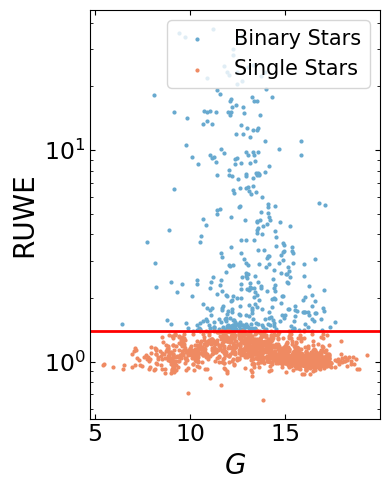

In [44]:
plt.figure(figsize =(4,5))
plt.scatter(df['phot_g_mean_mag'][masked_ruwe_bin], df['ruwe'][masked_ruwe_bin], color='#67a9cf', label='Binary Stars', s = 4)
plt.scatter(df['phot_g_mean_mag'][~masked_ruwe_bin], df['ruwe'][~masked_ruwe_bin], color='#ef8a62', label='Single Stars', s = 4)
plt.yscale('log')
plt.axhline(1.4, color= 'r', linestyle= '-', linewidth = 2)
plt.xlabel(r'$G$')
plt.ylabel('RUWE')

plt.legend()
plt.tick_params('both', direction='in', top=True, right=True)
plt.tick_params('both', which='minor', direction='in', right=True)
plt.tight_layout()

# plt.savefig('../../plots/presentation/ruweflag.png')


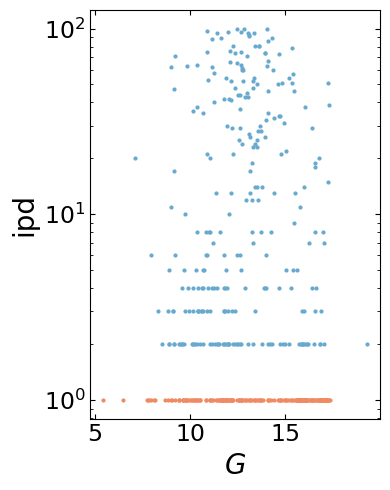

In [48]:
plt.figure(figsize = (4,5))
plt.scatter(df['phot_g_mean_mag'][masked_ipd_bin], df['ipd_frac_multi_peak'][masked_ipd_bin], color='#67a9cf', label='Binary Stars', s= 4)
plt.scatter(df['phot_g_mean_mag'][~masked_ipd_bin], df['ipd_frac_multi_peak'][~masked_ipd_bin], color='#ef8a62', label='Single Stars',s=4)
plt.yscale('log')
plt.xlabel(r'$G$')
plt.ylabel('ipd')

plt.tick_params('both', direction='in', top=True, right=True)
plt.tick_params('both', which='minor', direction='in', right=True)
plt.tight_layout()
plt.savefig('../../plots/presentation/ipdflag.png')


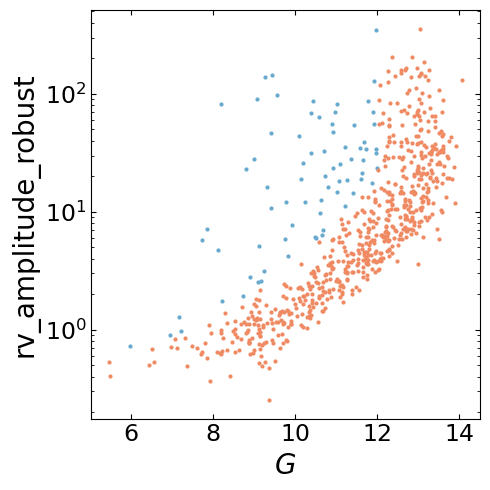

In [50]:
plt.figure(figsize = (5,5))
plt.scatter(df['phot_g_mean_mag'][masked_rv_amp_bin], df['rv_amplitude_robust'][masked_rv_amp_bin], color='#67a9cf', label='Binary Stars', s = 4)
plt.scatter(df['phot_g_mean_mag'][~masked_rv_amp_bin], df['rv_amplitude_robust'][~masked_rv_amp_bin], color='#ef8a62', label='Single Stars', s = 4)
plt.yscale('log')
plt.xlabel(r'$G$')
plt.ylabel('rv_amplitude_robust')

plt.tick_params('both', direction='in', top=True, right=True)
plt.tick_params('both', which='minor', direction='in', right=True)

# Adjust layout to prevent overlap
# plt.legend()
plt.tight_layout()
plt.savefig('../../plots/presentation/rv_amp.png')
plt.show()

In [180]:
df['rv_amplitude_robust'].info()

name = rv_amplitude_robust
dtype = float32
unit = km / s
description = Total amplitude in the radial velocity time series after outlier
     removal
class = MaskedColumn
n_bad = 1106
length = 1807


In [186]:
clean_rv = [np.nan if val == '--' else val for val in df['rv_amplitude_robust']]
tab = df[~np.isnan(clean_rv)]
# tab.write('../../catalogs/Combined/main_non_rep_garchive_after_rv_removed.vot',format = 'votable' )

/var/folders/63/qfkhcrwd7b72kqr1sr3jz6s80000gn/T/ipykernel_64762/2133022867.py:2: UserWarning: Warning: converting a masked element to nan.
  tab = df[~np.isnan(clean_rv)]


In [44]:
tbl = Table.read('../../catalogs/TrainingSet/combined.csv')
tbl

source_id,ra,dec,phot_g_mean_mag,bp_rp,ruwe,ipd_frac_multi_peak,rv_amplitude_robust,Single,unresolved,resolved
int64,float64,float64,float64,float64,float64,int64,float64,int64,int64,int64
429535384479232,45.084708333333325,1.4172500000000001,10.25189,0.598249,4.92,87,--,0,1,0
961973890657152,46.020916666666665,2.7029722222222223,11.357053,0.739875,0.998,0,62.79316711425781,0,1,0
997948536825216,46.69608333333333,2.7144722222222226,7.990882,0.185992,2.487,41,--,0,1,0
1268325318000128,44.312083333333334,1.8875833333333334,8.011133,0.769515,1.745,100,--,0,1,0
1753553543188992,45.463583333333325,3.1380555555555554,8.163041,0.126472,1.033,0,5.291431427001953,0,1,0
2543861884981632,47.31054166666666,3.24275,8.123917,0.066383,0.898,85,7.278628826141357,0,1,0
...,...,...,...,...,...,...,...,...,...,...
703790044252850688,127.45009240230564,26.77328596508202,12.167454719543457,4.397594451904297,1.1545532941818237,1,--,1,0,0
3796072592206250624,176.93768799004127,0.7991199702364985,9.60099983215332,3.0332584381103516,1.082581877708435,4,--,1,0,0


27319